In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import add

## Read in data

In [2]:
data = pd.read_csv('downsampling_data_ALL.csv')
full_stats = pd.read_csv('full_bam_statistics.csv')

In [3]:
full_stats

,Unnamed: 0,gsm,CpG_C,CHG_C,CHH_C,CpG_T,CHG_T,CHH_T,C_total,T_total,C_T_total,modC_perc,exp,cell
0,0,GSM1173794,11703082,5551137,16452128,230112118,1311936668,3975921743,33706347,5517970529,5551676876,0.607138,TAB,Mouse fetal cortex
1,1,GSM1173795,38787827,6927668,20734609,210347701,1325102150,3919710744,66450104,5455160595,5521610699,1.203455,TAB,Mouse adult cortex
2,2,GSM1180306,10937834,5163316,13947761,234367413,1232347108,3300416394,30048911,4767130915,4797179826,0.626387,TAB,Mouse ESCs
3,3,GSM1180307,9508974,4025014,10604784,207946905,1076711897,2791226185,24138772,4075884987,4100023759,0.588747,TAB,Mouse ESCs
4,4,GSM1180308,7129696,4469100,14041806,214905883,1191297419,3819849188,25640602,5226052490,5251693092,0.488235,TAB,Mouse ESCs
5,5,GSM1180315,111589850,5477704,13313010,88015651,988682511,2519100770,130380564,3595798932,3726179496,3.499041,BS,Mouse ESCs
6,6,GSM1180316,77178061,3941871,9424426,61477424,671988539,1654702229,90544358,2388168192,2478712550,3.652879,BS,Mouse ESCs
7,7,GSM1180317,169898602,8358067,22389752,94195831,1391089118,4027492341,200646421,5512777290,5713423711,3.511842,BS,Mouse ESCs
8,8,GSM1541958,168950631,24876432,112784461,40793055,1223230017,4334143803,306611524,5598166875,5904778399,5.192600,BS,Mouse neurons
9,9,GSM1541959,160384236,24357474,110552008,38366619,1161676107,4127164893,295293718,5327207619,5622501337,5.251999,BS,Mouse neurons


In [4]:
data

,Unnamed: 0,fn,power,seed,gsm,nreads,mCG,uCG,mCHG,uCHG,...,exp,cell,mC,uC,C,mC_perc,read_length,bases,coverage,coverage_perc
0,0,tmp/subBam/GSM3207181_down_2pow10_100_splittin...,10,100,GSM3207181,681,15,699,5,3931,...,ACE,Mouse ESCs,53,18066,18119,0.292511,150,102150,0.000037,0.003741
1,1,tmp/subBam/GSM3207181_down_2pow10_10_splitting...,10,10,GSM3207181,681,11,700,3,3852,...,ACE,Mouse ESCs,63,17870,17933,0.351308,150,102150,0.000037,0.003741
2,2,tmp/subBam/GSM3207181_down_2pow10_11_splitting...,10,11,GSM3207181,681,7,817,2,3883,...,ACE,Mouse ESCs,23,18222,18245,0.126062,150,102150,0.000037,0.003741
3,3,tmp/subBam/GSM3207181_down_2pow10_12_splitting...,10,12,GSM3207181,681,9,680,4,3934,...,ACE,Mouse ESCs,51,18045,18096,0.281830,150,102150,0.000037,0.003741
4,4,tmp/subBam/GSM3207181_down_2pow10_13_splitting...,10,13,GSM3207181,681,13,679,10,3889,...,ACE,Mouse ESCs,64,17850,17914,0.357262,150,102150,0.000037,0.003741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25865,25943,tmp/subBam/NA12878_50ng_rep2_down_2pow9_96.bam...,9,96,NA12878_50ng_rep2,511,213,168,1,1748,...,EM,human_bcells,227,8097,8324,2.727054,100,51100,0.000016,0.001597
25866,25944,tmp/subBam/NA12878_50ng_rep2_down_2pow9_97.bam...,9,97,NA12878_50ng_rep2,511,206,193,1,1860,...,EM,human_bcells,208,8059,8267,2.516028,100,51100,0.000016,0.001597
25867,25945,tmp/subBam/NA12878_50ng_rep2_down_2pow9_98.bam...,9,98,NA12878_50ng_rep2,511,221,225,1,1738,...,EM,human_bcells,228,8232,8460,2.695035,100,51100,0.000016,0.001597
25868,25946,tmp/subBam/NA12878_50ng_rep2_down_2pow9_99.bam...,9,99,NA12878_50ng_rep2,511,196,177,0,1816,...,EM,human_bcells,204,8186,8390,2.431466,100,51100,0.000016,0.001597


In [5]:
# create dictionary with key = GSM number and value = perc total modification from experiment full stats
full_stats_dic = {}
for x in range(0,len(full_stats)):
    sample = full_stats['gsm'][x]
    mod = full_stats['modC_perc'][x]
    full_stats_dic[f'{sample}']=mod
    
# create list with total modification from full dataset for each row in downsampled data set according to the experiment
# using dictionary created above
# add that list as a row to the data dataframe
full_stats_list = []
for gsm in data['gsm']:
    full_stats_list.append(full_stats_dic[f'{gsm}'])
    
data['full_stat']=full_stats_list

data['error']=data['full_stat']-data['mC_perc']

In [6]:
# create dictionary w/ each experiment as key and its corresponsding data frame as value
bs = data.groupby('exp').get_group('BS')
tab = data.groupby('exp').get_group('TAB')
ace = data.groupby('exp').get_group("ACE")
em_mouse = data.groupby(['exp','cell']).get_group(("EM",'Mouse neurons'))
em_human = data.groupby(['exp','cell']).get_group(("EM",'human_bcells'))

experiments = {'bs':bs,'tab':tab,'ace':ace,'em_mouse':em_mouse,'em_human':em_human}

In [7]:
# coverages list
coverages = {}

for key in experiments:
    coverage = []
    for name, group in experiments[key].groupby('coverage'):
        coverage.append(name)
    coverages[key]=coverage

## BS-seq and TAB-seq data combined

In [8]:
# create group by experiment
groups_exp_BS = experiments['bs'].groupby('gsm')
groups_exp_TAB = experiments['tab'].groupby('gsm')

# iterate over experiment groups...
experiments_BS = {}
experiments_TAB = {}

# starting with BS data
for name_exp, group in groups_exp_BS:
    #...and further group by coverage PERCENT
    group_coverage_perc = group.groupby('coverage_perc')
    # create dictionary for each coverage percent group's mC data
    boxes = {}
    # iterate over coverage percent groups...
    for name_coverage_perc, coverage_perc_group in group_coverage_perc:
        #... create list from mC_perc
        x = coverage_perc_group['mC_perc'].tolist()
        # and save that list, under its coverage percent in the boxes dictionary
        boxes[f'{name_coverage_perc}']=x
    # save the boxes dictionary in the experiments dictionay under its experiment name
    experiments_BS[f'{name_exp}']=boxes

# repeat for TAB data
for name_exp, group in groups_exp_TAB:
    group_coverage_perc = group.groupby('coverage_perc')
    boxes = {}
    for name_coverage_perc, coverage_perc_group in group_coverage_perc:
        x = coverage_perc_group['mC_perc'].tolist()
        boxes[f'{name_coverage_perc}']=x
    experiments_TAB[f'{name_exp}']=boxes
    
# create dictionary with just full stats from BS and TAB experiments
BS_TAB_stats = {}

for key in experiments_BS:
    BS_TAB_stats[f'{key}']=[full_stats_dic[f'{key}']]

for key in experiments_TAB:
    BS_TAB_stats[f'{key}']=[full_stats_dic[f'{key}']]
    


## Box Plot for BS/TAB data (Figure 2A)

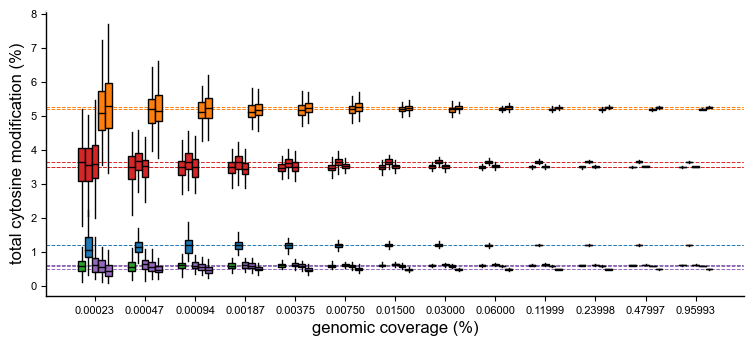

In [9]:
plt.style.use('ggplot')
plt.rcParams.update({'font.family':'Arial',"axes.spines.bottom":True})

fig, ax = plt.subplots(figsize=(9,3.7))

ax.set_facecolor('white')
ax.tick_params(grid_color='gray',grid_alpha=0)

colors = {'GSM1180315':'tab:red','GSM1180316':"tab:red","GSM1180317":"tab:red",
         "GSM1541958":"tab:orange","GSM1541959":"tab:orange",
         "GSM1173794":"tab:green",
         "GSM1173795":"tab:blue",
         "GSM1180306":"tab:purple","GSM1180307":"tab:purple",'GSM1180308':"tab:purple"}

position_list = [1,4,7,10,13,16,19,22,25,28,31,34,37]
counter = -0.8

# add horizontal line for each experiment corresponding to the modified cytosine level from the full (nondownsampled) experiment
for key in BS_TAB_stats:
    ax.axhline(y=BS_TAB_stats[f'{key}'][0],color=colors[f'{key}'],ls='--',lw=0.7)

# add boxplots for downsampling data at each coverage level for BS-seq experiments
for key in experiments_BS:
    boxes = experiments_BS[f'{key}']
    labels, points = [*zip(*boxes.items())]
    new_pos = [z+counter for z in position_list]
    bp = ax.boxplot(points,widths=0.4,positions=new_pos,patch_artist=True,showcaps=False,showfliers=False,
                   boxprops=dict(facecolor=colors[f'{key}'],color='black'),
                   capprops=dict(color='black'),
                   whiskerprops=dict(color='black'),
                   flierprops=dict(color='black', markeredgecolor='black'),
                   medianprops=dict(color='black'),manage_ticks=False
                   )
    counter+=0.4

position_list = [1,4,7,10,13,16,19,22,25,28,31,34,37]
counter = -0.8

# add boxplots for downsampling data at each coverage level for TAB-seq experiments
for key in experiments_TAB:
    boxes = experiments_TAB[f'{key}']
    labels, points = [*zip(*boxes.items())]
    new_pos = [z+counter for z in position_list]
    bp = ax.boxplot(points,widths=0.4,positions=new_pos,patch_artist=True,showcaps=False,showfliers=False,
                   boxprops=dict(facecolor=colors[f'{key}'],color='black'),
                   capprops=dict(color='black'),
                   whiskerprops=dict(color='black'),
                   flierprops=dict(color='black', markeredgecolor='black'),
                   medianprops=dict(color='black'),manage_ticks=False
                   )
    counter+=0.4


# set x ticks to appropriate coverage levels
tick_list = [1,4,7,10,13,16,19,22,25,28,31,34,37]    
ax.set_xticks(ticks=tick_list)
ax.set_xticklabels([f'{i*100:.5f}' for i in coverages['bs']],fontsize=8)

ax.set_yticks(np.arange(0,9,1))

plt.tick_params(axis='y',which='major',labelsize=8,color='black',labelcolor='black')
plt.tick_params(axis='x',which='major',color='black',labelcolor='black')

ax.set_ylabel('total cytosine modification (%)',fontsize=12,c='black')
ax.set_xlabel('genomic coverage (%)',fontsize=12,c='black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')


plt.show()
    

### Calculate statistics for BS/TAB downsampled data

* average % modified cytosines across downsampled replicates
* standard deviation of modified cytosine across downsampled replicates
* bias of each group of downsampled replicates (absolute value of the average error)
* coefficient of variation (std/avg)
* total analytical error (bias * 100 + 1.96 * 100 * coeffcient of variation)



In [109]:
# create empty dictionary to store data
stats_BS_TAB = {}

# for each experiment processed...
for name, group in groups_exp_BS:
    #...separated data into group by level (coverage) they were downsampled to
    cov_groups = group.groupby('coverage')
    cov_dict = {}
    # for each coverage (downsampled) level group of replicates...
    for cov, groupC in cov_groups:
        #...calculate the average value for modified cytosine...
        avg = groupC['mC_perc'].mean()
        #...calculate the standard deviation for modified cytosine...
        std = groupC['mC_perc'].std()
        #...calculate the bias...
        bias = abs(groupC['error'].mean())
        #...calculate the coefficient of variation...
        cov = std/avg
        #...calculate the total analytical error...
        tae = bias*100 + 1.96*100*cov
        #...pull out the coverage (this "mean" is just a means to pull the number out--each downsampled replicate will have the same number for coverage percent)...
        covg_perc = groupC['coverage_perc'].mean()
        #...pull out the modified C number from the full, nondownsampled data set (this number is also the same for each downsampled replicate)...
        full_perc = groupC['full_stat'].mean()
        #...compile statistics calculated above into a list...
        stat_list = [std,cov,avg,bias,tae,covg_perc,full_perc]
        #...add list of statistics to coverage dictionary under key corresponding to the coverage value to which the replicates were downsampled
        cov_dict[f'{covg_perc}']=stat_list
    # add dictionary of statistics list (value) by coverage level (key) as a value to dictionary where the key is the experiment (GSM)
    stats_BS_TAB[f'{name}']=cov_dict

# repeat as above but for TAB-seq data
for name, group in groups_exp_TAB:
    cov_groups = group.groupby('coverage')
    cov_dict = {}
    for cov, groupC in cov_groups:
        avg = groupC['mC_perc'].mean()
        std = groupC['mC_perc'].std()
        bias = abs(groupC['error'].mean())
        cov = std/avg
        tae = bias*100 + 1.96*100*cov
        covg_perc = groupC['coverage_perc'].mean()
        full_perc = groupC['full_stat'].mean()
        stat_list = [std,cov,avg,bias,tae,covg_perc,full_perc]
        cov_dict[f'{covg_perc}'] = stat_list
    stats_BS_TAB[f'{name}'] = cov_dict

# indeces in each statistics dictionary (stats_BS_TAB['GSM']['coverage level][i]) correspond to:
# 0 = standard deviation
# 1 = coefficient of variance
# 2 = average
# 3 = bias
# 4 = total analytical error
# 5 = % coverage
# 6 = experiment full dataset average

## TAE by downsampled coverage and experiment  (TAB/BS)

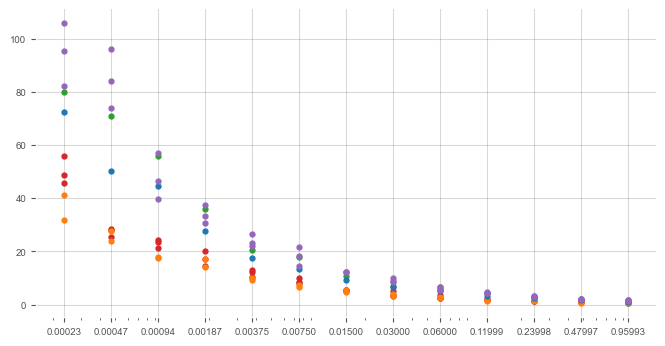

In [131]:
plt.style.use('ggplot')
plt.rcParams.update({'font.family':'Arial'})

fig, ax = plt.subplots(figsize=(8,4))

ax.set_facecolor('white')
ax.tick_params(grid_color='gray',grid_alpha=0.3)

colors = {'GSM1180315':'tab:red','GSM1180316':"tab:red","GSM1180317":"tab:red",
         "GSM1541958":"tab:orange","GSM1541959":"tab:orange",
         "GSM1173794":"tab:green",
         "GSM1173795":"tab:blue",
         "GSM1180306":"tab:purple","GSM1180307":"tab:purple",'GSM1180308':"tab:purple"}

for key in stats_BS_TAB:
    for power in stats_BS_TAB[f'{key}']:
        ax.plot(stats_BS_TAB[f'{key}'][f'{power}'][-2],stats_BS_TAB[f'{key}'][f'{power}'][4],ls='',marker='.',color=colors[f'{key}'],markersize=7)
        
ax.set_xscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

tick_list = [i*100 for i in coverages['bs']] 
ax.set_xticks(ticks=tick_list)
ax.set_xticklabels([f'{i*100:.5f}' for i in coverages['bs']],fontsize=8)

#ax.axhline(y=2)
plt.tick_params(axis='x',which='major',labelsize=7)
plt.tick_params(axis='y',which='major',labelsize=7)

plt.savefig('240105_BS_TAB_TAE.pdf',bbox_inches='tight',pad_inches=0)


plt.show()

In [125]:
# export data used in above plot to CSV

bs_tab_tae_data = pd.DataFrame()

gsm = []
power_list = []
coverage = []
tae = []
full_dataset_mod = []

# for each experiment (key)...
for key in stats_BS_TAB:
    #...iterate over coverage levels in downsampling...
    for power in stats_BS_TAB[f'{key}']:
        # add experiment to GSM list
        gsm.append(key)
        # add power of downsampling to power list
        power_list.append(power)
        # add coverage of downsampling to coverage list
        coverage.append(stats_BS_TAB[f'{key}'][f'{power}'][-2])
        # add TAE to tae list
        tae.append(stats_BS_TAB[f'{key}'][f'{power}'][4])
        #add full dataset (nondownsampled) modified cytosine information to full_dataset_mod list
        full_dataset_mod.append(stats_BS_TAB[f'{key}'][f'{power}'][6])

        
# test list are all the same length        
#print(len(gsm))
#print(len(power_list))
#print(len(coverage))
#print(len(tae))

# add lists created above to dataframe
bs_tab_tae_data["gsm"]=gsm
#bs_tab_tae_data['power']=power_list
bs_tab_tae_data['coverage_perc']=coverage
bs_tab_tae_data['tae']=tae
bs_tab_tae_data['full_dataset_mod']=full_dataset_mod
      
    
# add columns for experiment pipeline and cell type
exp=[]
cell=[]
for i in range(0,len(bs_tab_tae_data)):
    #print(data.iloc[i]['gsm'])
    if '118031' in bs_tab_tae_data.iloc[i]['gsm']:
        exp.append('BS')
        cell.append('Mouse ESCs')
    if '154' in bs_tab_tae_data.iloc[i]['gsm']:
        exp.append('BS')
        cell.append('Mouse neurons')
    if '118030' in bs_tab_tae_data.iloc[i]['gsm']:
        exp.append('TAB')
        cell.append("Mouse ESCs")
    if '320718' in bs_tab_tae_data.iloc[i]['gsm']:
        exp.append('ACE')
    if '3207181' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('Mouse ESCs')
    if '3207182' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('Mouse ESCs')
    if '3207183' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('TetTKO mESCs')
    if '3207184' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('TetTKO mESCs')
    if '3207185' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('Mouse neurons')
    if '3207186' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('Mouse neurons')
    if '1173794' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('Mouse fetal cortex')
        exp.append('TAB')
    if '1173795' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('Mouse adult cortex')
        exp.append('TAB')
    if 'NA12878' in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('human_bcells')
        exp.append('EM')
    if "584964" in bs_tab_tae_data.iloc[i]['gsm']:
        cell.append('Mouse neurons')
        exp.append('EM')
        
bs_tab_tae_data['exp']=exp
bs_tab_tae_data['cell']=cell


In [ ]:
bs_tab_tae_data

In [127]:
bs_tab_tae_data.to_csv('bs_tab_tae_data.csv')